# Linear Error-in-Variables Mixture Model

Reproduction of examples from section 4 in the original paper; the main aim is to compare the treelet transform with PCA.The task at hand is the recovery of the unobserved structure of the mixture model from a random sample. 

## Setup

In [168]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
import sys
import os

In [4]:
sys.path.append("../scripts")
import python_treelet_implementation as pytree
import test_treelets_mixture_models as ttmm
import utils

## Model setup

The paper considers a sample $\left \{ \vec{x}_i,y_i \right \}_{i=1}^{n}$ where each multivariate observation $\vec{x} \in \mathbb{R}^p$ has the form $\vec{x} = \sum_{i=}^{K}u_j \vec{v}_j + \sigma \vec{z}$, where each component corresponds to:

* factors: $\left ( u_1, ... u_k \right )^T \sim F_{u_1,...,u_K}$
* loading vectors: $\vec{v}_j$ 
* noise: $\vec{z} \sim \mathcal{N}_p\left ( 0, I \right )$

The response variable has the form $y = \sum_{i=1}^{K}\alpha_j u_j + \epsilon$, where: 

* factor weights: $\alpha_j$ 
* noise: $\epsilon \sim \text{i.i.d}\left ( 0, \sigma_\epsilon^2 \right )$ 

## Uncorrelated factors and non-overlapping loading vectors 

Data is simulated according to example 1.

In [286]:
X = ttmm.linear_mixture_model(V = np.array([[1,1,1,1,0,0,0,0,0,0],
                                            [0,0,0,0,1,1,1,1,0,0],
                                            [0,0,0,0,0,0,0,0,1,1]])\
                                    .transpose(),
                         C = 2*np.identity(3), 
                         sigma = 1, 
                         n = 10000)

Sample covaraince matrix exhibits block structure as required and expected. 

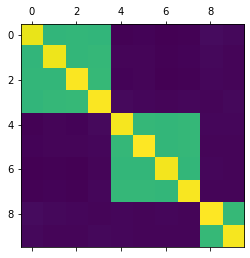

In [287]:
plt.matshow(np.cov(X.transpose()))

However PCA does not recover the loading vectors...

In [288]:
pca = PCA(n_components=3)
pca.fit(X)
print(pca.components_)

[[ 0.1041182   0.10121794  0.10552794  0.09711539 -0.48813347 -0.49174094
  -0.48773258 -0.49026155 -0.00360263 -0.00330378]
 [ 0.48367265  0.48769673  0.49241571  0.49381108  0.10494334  0.10413814
   0.09812195  0.10048704  0.01341667  0.01125281]
 [ 0.00114693  0.01036557  0.01137274  0.00921688  0.00088172  0.00533337
   0.00355905  0.00685022 -0.71011288 -0.70379531]]


And the principal eigenvectors of the sample covaraince mattrix do not identify the loadings either...

In [289]:
np.linalg.eig(np.cov(X.transpose()))[1]

array([[ 0.48367265, -0.1041182 ,  0.00114693,  0.2016231 , -0.22500522,
         0.76139459, -0.11638641, -0.16497232, -0.12603883, -0.16604355],
       [ 0.48769673, -0.10121794,  0.01036557,  0.07823247, -0.36715807,
        -0.31366482,  0.54640728,  0.41379439,  0.05663612, -0.19873104],
       [ 0.49241571, -0.10552794,  0.01137274,  0.19371831,  0.47866934,
        -0.10253105,  0.08599169, -0.07972004, -0.04880753,  0.67302712],
       [ 0.49381108, -0.09711539,  0.00921688, -0.47041052,  0.10223723,
        -0.33782005, -0.50928464, -0.17560401,  0.11207523, -0.31305735],
       [ 0.10494334,  0.48813347,  0.00088172, -0.41822916,  0.03183402,
         0.33787675, -0.04779671,  0.48244712,  0.40876789,  0.24184948],
       [ 0.10413814,  0.49174094,  0.00533337,  0.59143003,  0.37231802,
        -0.10298566, -0.09120172,  0.02301542,  0.25614541, -0.41694542],
       [ 0.09812195,  0.48773258,  0.00355905, -0.00205766, -0.48610589,
        -0.17270162,  0.11853092, -0.61844767

Running the treelet decomposition similarly does not does not return a useful basis... 

In [290]:
tree = pytree.treelet_decomposition(X = X.transpose(),
                                   L = 6, 
                                   abs_ = False)

best_basis = pytree.best_basis(tree = tree, 
                               K = 3, 
                               X = X.transpose())

In [291]:
best_basis[0]["basis"]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])